<a href="https://colab.research.google.com/github/msivakumar47/SIVAKUMAR-M/blob/main/k_means_project17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KNN Classification Results:
----------------------------
K = 1  | Train Accuracy: 1.000 | Test Accuracy: 0.967 | Time (s): 0.0060
K = 3  | Train Accuracy: 0.967 | Test Accuracy: 0.933 | Time (s): 0.0042
K = 5  | Train Accuracy: 0.975 | Test Accuracy: 0.933 | Time (s): 0.0041
K = 7  | Train Accuracy: 0.967 | Test Accuracy: 0.967 | Time (s): 0.0041
K = 9  | Train Accuracy: 0.958 | Test Accuracy: 0.967 | Time (s): 0.0040
K = 11 | Train Accuracy: 0.958 | Test Accuracy: 0.967 | Time (s): 0.0051
K = 13 | Train Accuracy: 0.958 | Test Accuracy: 0.967 | Time (s): 0.0042
K = 15 | Train Accuracy: 0.967 | Test Accuracy: 0.933 | Time (s): 0.0042


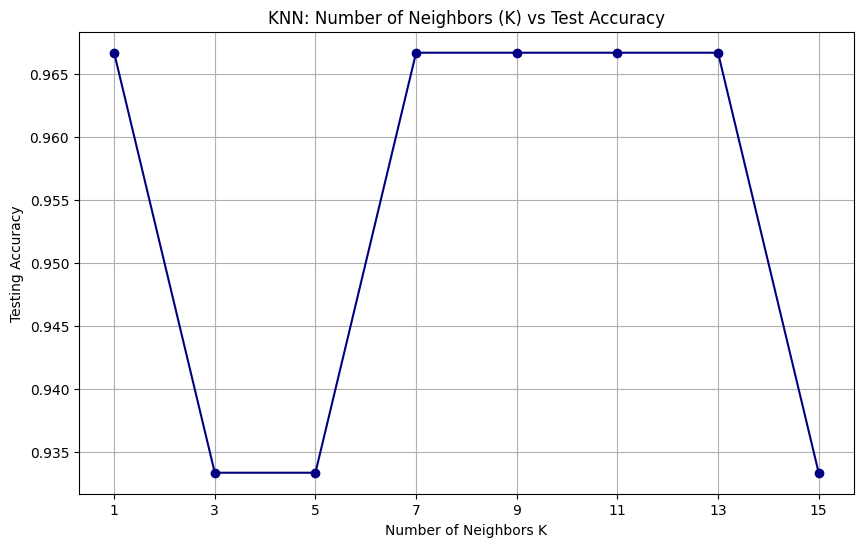


Optimal K value: 1 with Test Accuracy: 0.967

Analysis:
- Lower K values (e.g., K=1) tend to have high training accuracy but can overfit, resulting in higher variance and lower generalization to unseen data.
- Higher K values smooth the decision boundary, increasing bias and potentially underfitting the data, which may lower training accuracy but can reduce variance.
- The optimal K = 1 balances this trade-off, providing the best test accuracy on unseen data, demonstrating a good generalization capability for the KNN classifier in this task.
- This behavior aligns with the fundamental bias-variance trade-off in machine learning where model complexity is controlled through the hyperparameter K.



In [8]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Feature scaling to standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into 80% training and 20% testing sets with stratified sampling
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# Range of odd K values to test
k_values = list(range(1, 16, 2))

# Lists to store results
train_accuracies = []
test_accuracies = []
times = []

print("KNN Classification Results:")
print("----------------------------")

# Iterate over different K values for KNN
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)

    start_time = time.time()
    knn.fit(X_train, y_train)
    train_pred = knn.predict(X_train)
    test_pred = knn.predict(X_test)
    end_time = time.time()

    train_acc = accuracy_score(y_train, train_pred)
    test_acc = accuracy_score(y_test, test_pred)
    elapsed_time = end_time - start_time

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)
    times.append(elapsed_time)

    print(f"K = {k:<2} | Train Accuracy: {train_acc:.3f} | Test Accuracy: {test_acc:.3f} | Time (s): {elapsed_time:.4f}")

# Plot testing accuracy vs K
plt.figure(figsize=(10, 6))
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='navy')
plt.title("KNN: Number of Neighbors (K) vs Test Accuracy")
plt.xlabel("Number of Neighbors K")
plt.ylabel("Testing Accuracy")
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Find and print the optimal K value based on highest testing accuracy
optimal_k = k_values[np.argmax(test_accuracies)]
max_test_acc = max(test_accuracies)

print(f"\nOptimal K value: {optimal_k} with Test Accuracy: {max_test_acc:.3f}")

# Textual interpretation on bias-variance trade-off and K choice
analysis_text = f"""
Analysis:
- Lower K values (e.g., K=1) tend to have high training accuracy but can overfit, resulting in higher variance and lower generalization to unseen data.
- Higher K values smooth the decision boundary, increasing bias and potentially underfitting the data, which may lower training accuracy but can reduce variance.
- The optimal K = {optimal_k} balances this trade-off, providing the best test accuracy on unseen data, demonstrating a good generalization capability for the KNN classifier in this task.
- This behavior aligns with the fundamental bias-variance trade-off in machine learning where model complexity is controlled through the hyperparameter K.
"""
print(analysis_text)
